In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense
from sklearn.metrics import accuracy_score
data = pd.read_csv("C:/Users/Abhi/Desktop/CSV files/Weather.csv")
data.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,01-01-2012,0.0,12.8,5.0,4.7,drizzle
1,02-01-2012,10.9,10.6,2.8,4.5,rain
2,03-01-2012,0.8,11.7,7.2,2.3,rain
3,04-01-2012,20.3,12.2,5.6,4.7,rain
4,05-01-2012,1.3,8.9,2.8,6.1,rain


Drizzle 641
Rain 640
Sun weather 101
Snow 53
Fog 26


C:\Users\Abhi\anaconda3\envs\tensorflow\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


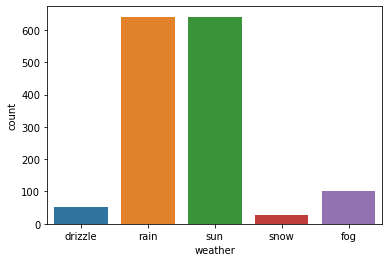

In [2]:
import seaborn as sns
ax = sns.countplot(data['weather'], label = 'Count')
drizzle, rain, sun, snow, fog = data['weather'].value_counts()
print('Drizzle', drizzle)
print('Rain', rain)
print('Sun weather', sun)
print('Snow', snow)
print('Fog', fog)

In [3]:
X = data.iloc[:,1:5].values
y = data.iloc[:,5].values

In [5]:
y = pd.get_dummies(data.weather)
y

,drizzle,fog,rain,snow,sun
0,1,0,0,0,0
1,0,0,1,0,0
2,0,0,1,0,0
3,0,0,1,0,0
4,0,0,1,0,0
...,...,...,...,...,...
1456,0,0,1,0,0
1457,0,0,1,0,0
1458,0,1,0,0,0
1459,0,0,0,0,1


In [6]:
y = y.astype(float)
y

,drizzle,fog,rain,snow,sun
0,1.0,0.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...
1456,0.0,0.0,1.0,0.0,0.0
1457,0.0,0.0,1.0,0.0,0.0
1458,0.0,1.0,0.0,0.0,0.0
1459,0.0,0.0,0.0,0.0,1.0


In [7]:
# splitting data set into training and testing dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.25, random_state = 42)

In [8]:
# Feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [9]:
import tensorflow 
import keras
from keras.models import Sequential
from keras import layers
from keras.layers import Dense

In [10]:
model = keras.Sequential([
    keras.layers.Dense(4, input_shape = (4,), activation  = 'relu'),
    keras.layers.Dense(4, activation  = 'relu'),
    keras.layers.Dense(5, activation = 'softmax')
])

In [11]:
# compiling model
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [12]:
# Fitting 
model.fit(X_train, y_train, epochs=10, batch_size = 10)

Epoch 1/10
110/110 [==============================] - 0s 1ms/step - loss: 1.5126 - accuracy: 0.4137
Epoch 2/10
110/110 [==============================] - 0s 1ms/step - loss: 1.3055 - accuracy: 0.4502
Epoch 3/10
110/110 [==============================] - 0s 1ms/step - loss: 1.1793 - accuracy: 0.4685
Epoch 4/10
110/110 [==============================] - 0s 1ms/step - loss: 1.1166 - accuracy: 0.5050
Epoch 5/10
110/110 [==============================] - 0s 1ms/step - loss: 1.0764 - accuracy: 0.5644
Epoch 6/10
110/110 [==============================] - 0s 2ms/step - loss: 1.0452 - accuracy: 0.6493
Epoch 7/10
110/110 [==============================] - 0s 2ms/step - loss: 1.0164 - accuracy: 0.6685
Epoch 8/10
110/110 [==============================] - 0s 1ms/step - loss: 0.9867 - accuracy: 0.6840
Epoch 9/10
110/110 [==============================] - 0s 2ms/step - loss: 0.9520 - accuracy: 0.6995
Epoch 10/10
110/110 [==============================] - 0s 2ms/step - loss: 0.9038 - accuracy: 0.7123

In [13]:
# Train accuracy
_, accuracy = model.evaluate(X_train, y_train)
print('Train accuracy: %.2f' % (accuracy*100))

35/35 [==============================] - 0s 921us/step - loss: 0.8715 - accuracy: 0.7233
Train accuracy: 72.33
